In [26]:
import numpy as np
import pandas as pd
myData = pd.read_csv('../../data/ObesityDataSet.csv')
print(myData.shape)

(2111, 17)


In [27]:
peek = myData.head(10)
print(peek)

    Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC SMOKE  CH2O  \
0  21.0  Female    1.62    64.0          no   no   2.0  3.0   no    no   2.0   
1  21.0  Female    1.52    56.0   Sometimes   no   3.0  3.0  yes   yes   3.0   
2  23.0    Male    1.80    77.0  Frequently   no   2.0  3.0   no    no   2.0   
3  27.0    Male    1.80    87.0  Frequently   no   3.0  3.0   no    no   2.0   
4  22.0    Male    1.78    89.8   Sometimes   no   2.0  1.0   no    no   2.0   
5  29.0    Male    1.62    53.0   Sometimes  yes   2.0  3.0   no    no   2.0   
6  23.0  Female    1.50    55.0   Sometimes  yes   3.0  3.0   no    no   2.0   
7  22.0    Male    1.64    53.0   Sometimes   no   2.0  3.0   no    no   2.0   
8  24.0    Male    1.78    64.0  Frequently  yes   3.0  3.0   no    no   2.0   
9  22.0    Male    1.72    68.0          no  yes   2.0  3.0   no    no   2.0   

  family_history_with_overweight  FAF  TUE       CAEC                 MTRANS           NObeyesdad  
0                  

In [28]:
shape = myData.shape
print(shape)

(2111, 17)


In [29]:
types = myData.dtypes
print(types)

Age                               float64
Gender                             object
Height                            float64
Weight                            float64
CALC                               object
FAVC                               object
FCVC                              float64
NCP                               float64
SCC                                object
SMOKE                              object
CH2O                              float64
family_history_with_overweight     object
FAF                               float64
TUE                               float64
CAEC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


In [30]:
outcome_counts = myData.groupby('NObeyesdad').size()
print(outcome_counts)

NObeyesdad
Insufficient_Weight    272
Normal_Weight          287
Obesity_Type_I         351
Obesity_Type_II        297
Obesity_Type_III       324
Overweight_Level_I     290
Overweight_Level_II    290
dtype: int64


In [31]:
from pandas import set_option

set_option('display.width', 100)
set_option('precision', 3)
correlations = myData.corr(method = 'pearson')
print(correlations)

          Age  Height  Weight   FCVC    NCP   CH2O    FAF    TUE
Age     1.000  -0.026   0.203  0.016 -0.044 -0.045 -0.145 -0.297
Height -0.026   1.000   0.463 -0.038  0.244  0.213  0.295  0.052
Weight  0.203   0.463   1.000  0.216  0.107  0.201 -0.051 -0.072
FCVC    0.016  -0.038   0.216  1.000  0.042  0.068  0.020 -0.101
NCP    -0.044   0.244   0.107  0.042  1.000  0.057  0.130  0.036
CH2O   -0.045   0.213   0.201  0.068  0.057  1.000  0.167  0.012
FAF    -0.145   0.295  -0.051  0.020  0.130  0.167  1.000  0.059
TUE    -0.297   0.052  -0.072 -0.101  0.036  0.012  0.059  1.000


<AxesSubplot:ylabel='Frequency'>

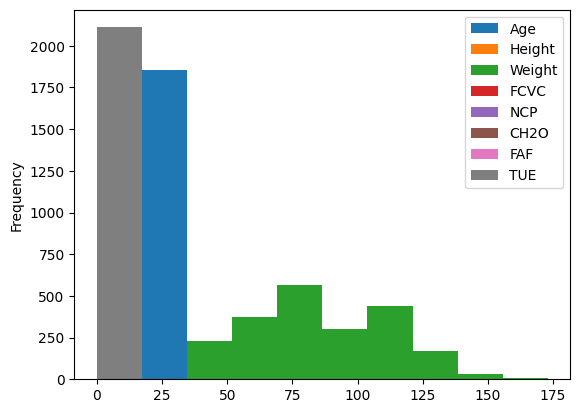

In [32]:
import matplotlib.pyplot as plt
myData.plot.hist()

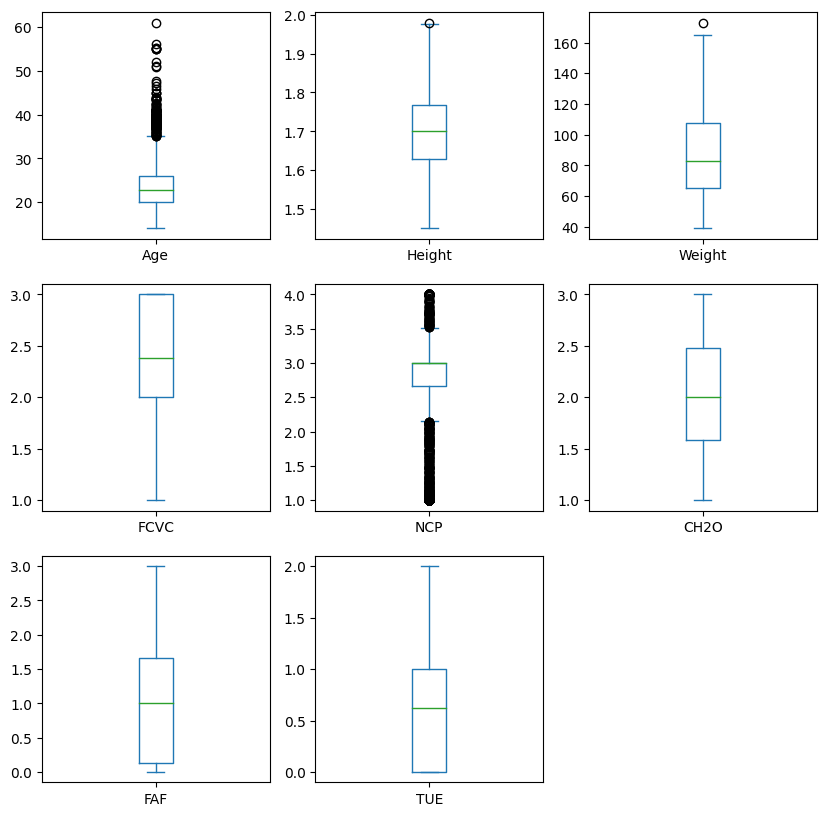

In [33]:
myData.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize = (10,10))
plt.show()

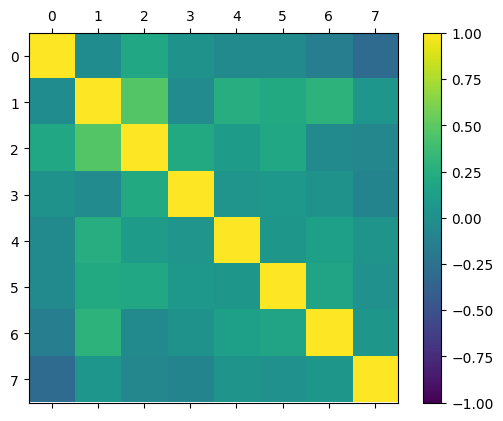

In [34]:
correlations = myData.corr()
# plot correlation matrix
myfig = plt.figure()
axis = myfig.add_subplot(111) # There is only one subplot or graph;
# "111" means "1x1 grid, first subplot"
cax = axis.matshow(correlations, vmin = -1, vmax = 1)
myfig.colorbar(cax)
ticks = np.arange(0, 9, 1)

In [35]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from numpy import set_printoptions

label_encoder = LabelEncoder()

categorical_columns = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad']

for col in categorical_columns:
    myData[col] = label_encoder.fit_transform(myData[col])

In [36]:
X = myData.drop('NObeyesdad', axis=1).values
Y = myData['NObeyesdad'].values

mydataScaler = MinMaxScaler(feature_range=(0, 1))
mydataRescaled = mydataScaler.fit_transform(X)

set_printoptions(precision=3)
print(mydataRescaled[20:25, :])

[[0.17  1.    0.377 0.306 1.    0.    0.5   0.667 0.    0.    0.5   1.
  1.    1.    0.667 1.   ]
 [0.809 0.    0.453 0.358 1.    1.    1.    0.    0.    1.    0.5   1.
  0.    0.    0.667 0.   ]
 [0.17  0.    0.377 0.157 0.667 1.    1.    0.667 0.    0.    0.5   1.
  0.333 0.    0.667 0.   ]
 [0.17  0.    0.283 0.321 0.667 1.    0.    0.    0.    0.    0.5   1.
  0.    1.    0.667 0.75 ]
 [0.149 1.    0.755 0.216 0.667 1.    0.5   0.667 0.    0.    0.5   1.
  0.    0.5   0.667 0.75 ]]


In [37]:
from sklearn.preprocessing import LabelEncoder, Normalizer

myData.replace([np.inf, -np.inf], np.nan, inplace=True)
myData.dropna(inplace=True)

mydata_train = myData.drop('NObeyesdad', axis=1).values
mydata_label = myData['NObeyesdad'].values

mydataScaler = Normalizer().fit(mydata_train)
mydataNormalized = mydataScaler.transform(mydata_train)

set_printoptions(precision=3)
print(mydataNormalized[20:25, :])

[[0.264 0.012 0.02  0.96  0.036 0.    0.024 0.036 0.    0.    0.024 0.012
  0.036 0.024 0.024 0.048]
 [0.512 0.    0.017 0.857 0.03  0.01  0.03  0.01  0.    0.01  0.02  0.01
  0.    0.    0.02  0.   ]
 [0.343 0.    0.026 0.935 0.031 0.016 0.047 0.047 0.    0.    0.031 0.016
  0.016 0.    0.031 0.   ]
 [0.259 0.    0.019 0.964 0.024 0.012 0.012 0.012 0.    0.    0.024 0.012
  0.    0.024 0.024 0.035]
 [0.294 0.014 0.026 0.952 0.028 0.014 0.028 0.042 0.    0.    0.028 0.014
  0.    0.014 0.028 0.042]]


In [38]:
from sklearn.preprocessing import Binarizer

mydataBinarizer = Binarizer(threshold=0.0).fit(mydata_train)
mydatabinarized = mydataBinarizer.transform(mydata_train)
set_printoptions(precision = 3)
print(mydatabinarized[0:5,:])

[[1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1.]
 [1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1.]]


In [39]:
from sklearn.feature_selection import SelectKBest, f_regression

myData.replace([np.inf, -np.inf], np.nan, inplace=True)
myData.dropna(inplace=True)

min_value = myData.drop('NObeyesdad', axis=1).min().min()
if min_value < 0:
    myData += abs(min_value)

mydata_train = myData.drop('NObeyesdad', axis=1).values
mydata_label = myData['NObeyesdad'].values

myFeature = SelectKBest(score_func=f_regression, k=4)
fit = myFeature.fit(mydata_train, mydata_label)

set_printoptions(precision=3)
print(fit.scores_)

[124.581   1.309   3.21  372.955  38.933   4.2     0.724  18.247   5.431
   1.141  25.296 230.141  36.008  10.221 253.025   4.512]


In [40]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
mydataRFE = RFE(model, n_features_to_select=4)
mydataFit = mydataRFE.fit(mydata_train, mydata_label)

print("Number of features selected: %d" % mydataFit.n_features_)
print("Selected features are denoted by True: %s" % mydataFit.support_)
print("Feature Ranking: %s" % mydataFit.ranking_)

Number of features selected: 4
Selected features are denoted by True: [False False False False  True  True False False False False False  True
 False False  True False]
Feature Ranking: [ 9 10  7 13  1  1 12  3  4  2  6  1  5 11  1  8]


In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
fit = pca.fit(mydata_train)
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.941 0.054 0.001]
[[ 5.193e-02  3.087e-03  1.642e-03  9.986e-01 -4.064e-03  3.328e-03
   4.394e-03  3.166e-03 -1.612e-03  1.462e-04  4.665e-03  7.337e-03
  -1.724e-03 -1.745e-03  5.143e-03 -1.444e-04]
 [ 9.899e-01  1.337e-03 -1.866e-03 -5.156e-02  7.560e-06  3.786e-04
  -2.735e-03 -8.377e-03 -2.482e-03  1.986e-03 -8.927e-03  6.303e-03
  -1.868e-02 -2.820e-02  1.771e-03 -1.272e-01]
 [ 1.042e-01 -1.390e-01 -3.046e-02 -4.344e-03 -1.891e-02 -1.435e-02
   4.375e-02 -2.546e-01 -2.510e-03  5.624e-03 -6.440e-02 -2.002e-02
  -3.379e-01 -1.766e-02 -1.016e-02  8.845e-01]]


In [42]:
pca=PCA(0.92)
selectedFeatures = pca.fit_transform(mydata_train)
print (selectedFeatures.shape)

(2111, 1)


In [43]:
pca=PCA(0.98)
selectedFeatures=pca.fit_transform(mydata_train)
print (selectedFeatures.shape)

(2111, 2)


In [44]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier

myData['num'] = pd.cut(myData['NObeyesdad'], bins=3, labels=[0, 1, 2])
mydata_label = myData['NObeyesdad'].values

model = ExtraTreesClassifier()
model.fit(mydata_train, mydata_label)
print(model.feature_importances_)

[0.076 0.076 0.08  0.281 0.054 0.025 0.076 0.056 0.012 0.004 0.044 0.046
 0.045 0.046 0.041 0.04 ]
